<a href="https://colab.research.google.com/github/adrien50/facedetection/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection

Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph.

Locating a face in a photograph refers to finding the coordinate of the face in the image, whereas localization refers to demarcating the extent of the face, often via a bounding box around the face. reference https://machinelearningmastery.com/

Face Detection With OpenCV

Feature-based face detection algorithms are fast and effective and have been used successfully for decades.

Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper titled “Rapid Object Detection using a Boosted Cascade of Simple Features.”

In the paper, effective features are learned using the AdaBoost algorithm, although importantly, multiple models are organized into a hierarchy or “cascade.”

In the paper, the AdaBoost model is used to learn a range of very simple or weak features in each face, that together provide a robust classifier.

A modern implementation of the Classifier Cascade face detection algorithm is provided in the OpenCV library. This is a C++ computer vision library that provides a python interface. The benefit of this implementation is that it provides pre-trained face detection models, and provides an interface to train a model on your own dataset.

OpenCV can be installed by the package manager system on your platform, or via pip; for example:

In [ ]:
	!sudo pip install opencv-python

Once the installation process is complete, it is important to confirm that the library was installed correctly.

This can be achieved by importing the library and checking the version number; for example

In [ ]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.1.2


OpenCV provides the CascadeClassifier class that can be used to create a cascade classifier for face detection. The constructor can take a filename as an argument that specifies the XML file for a pre-trained model.

OpenCV provides a number of pre-trained models as part of the installation. These are available on your system and are also available on the OpenCV GitHub project.

Download a pre-trained model for frontal face detection from the OpenCV GitHub project and place it in your current working directory with the filename ‘haarcascade_frontalface_default.xml‘.we can load the model as follows:

In [ ]:
# load the pre-trained model
from cv2 import CascadeClassifier
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

Once loaded, the model can be used to perform face detection on a photograph by calling the detectMultiScale() function.

This function will return a list of bounding boxes for all faces detected in the photograph.

In [ ]:
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import CascadeClassifier
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)

[174  75 107 107]
[360 102 101 101]


Running the example first loads the photograph, then loads and configures the cascade classifier; faces are detected and each bounding box is printed.

Each box lists the x and y coordinates for the bottom-left-hand-corner of the bounding box, as well as the width and the height. The results suggest that two bounding boxes were detected.

We can update the example to plot the photograph and draw each bounding box.

This can be achieved by drawing a rectangle for each box directly over the pixels of the loaded image using the rectangle() function that takes two points.

 extract
 
x, y, width, height = box

x2, y2 = x + width, y + height

 draw a rectangle over the pixels

rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

We can then plot the photograph and keep the window open until we press a key to close it.

 show the image

imshow('face detection', pixels)

 keep the window open until we press a key

waitKey(0)

 close the window
destroyAllWindows()

 show the image

imshow('face detection', pixels)

 keep the window open until we press a key

waitKey(0)

 close the window

destroyAllWindows()

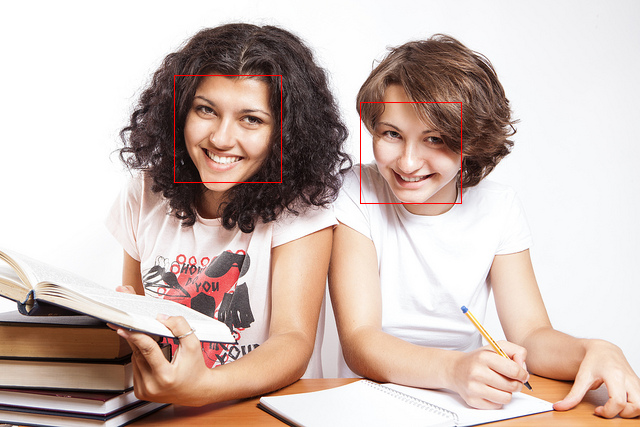

In [ ]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image. The default value is 1.1 (10% increase), although this can be lowered to values such as 1.05 (5% increase) or raised to values such as 1.4 (40% increase).

The minNeighbors determines how robust each detection must be in order to be reported, e.g. the number of candidate rectangles that found the face. The default is 3, but this can be lowered to 1 to detect a lot more faces and will likely increase the false positives, or increase to 6 or more to require a lot more confidence before a face is detected.

The scaleFactor and minNeighbors often require tuning for a given image or dataset in order to best detect the faces. It may be helpful to perform a sensitivity analysis across a grid of values and see what works well or best in general on one or multiple photographs.

A fast strategy may be to lower (or increase for small photos) the scaleFactor until all faces are detected, then increase the minNeighbors until all false positives disappear, or close to it.

With some tuning, I found that a scaleFactor of 1.05 successfully detected all of the faces, but the background detected as a face did not disappear until a minNeighbors of 8, after which three faces on the middle row were no longer detected.

# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)


## Face Detection With Deep Learning

A number of deep learning methods have been developed and demonstrated for face detection.

Perhaps one of the more popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.
The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.

The three models are not connected directly; instead, outputs of the previous stage are fed as input to the next stage. This allows additional processing to be performed between stages; for example, non-maximum suppression (NMS) is used to filter the candidate bounding boxes proposed by the first-stage P-Net prior to providing them to the second stage R-Net model.

The MTCNN architecture is reasonably complex to implement. Thankfully, there are open source implementations of the architecture that can be trained on new datasets, as well as pre-trained models that can be used directly for face detection. 

In [ ]:
	
!sudo pip install mtcnn

In [ ]:
	
!sudo pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras, opencv-python
Required-by: 


By default, the library will use the pre-trained model, although you can specify your own model via the ‘weights_file‘ argument and specify a path or URL, for example:

model = MTCNN(weights_file='filename.npy')


The minimum box size for detecting a face can be specified via the ‘min_face_size‘ argument, which defaults to 20 pixels. The constructor also provides a ‘scale_factor‘ argument to specify the scale factor for the input image, which defaults to 0.709.

Once the model is configured and loaded, it can be used directly to detect faces in photographs by calling the detect_faces() function.

This returns a list of dict object, each providing a number of keys for the details of each face detected, including:

‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.

‘confidence‘: The probability confidence of the prediction.

‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘.

For example, we can perform face detection on the college students photograph as follows:

In [ ]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


We can draw the boxes on the image by first plotting the image with matplotlib, then creating a Rectangle object using the x, y and width and height of a given bounding box; for example:

# get coordinates
x, y, width, height = result['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')

# get coordinates
x, y, width, height = result['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
Below is a function named draw_image_with_boxes() that shows the photograph and then draws a box for each bounding box detected.

In [ ]:

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

We can draw a circle via the Circle class for the eyes, nose, and mouth; for example

# draw the dots
for key, value in result['keypoints'].items():

	# create and draw dot

	dot = Circle(value, radius=2, color='red')
  
	ax.add_patch(dot)


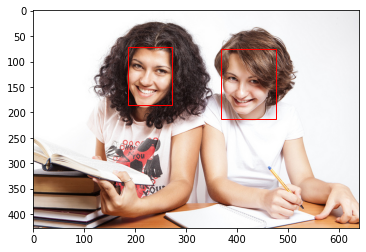

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

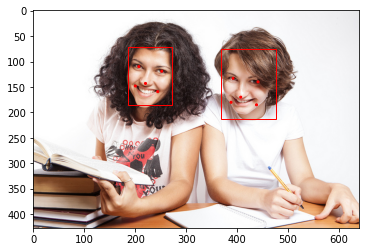

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)